## Preprocessing

In [18]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#planting seeds
tf.random.set_seed(42)

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [19]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)

# Determine the number of unique values in each column.
unique_values = application_df.nunique()
print(unique_values)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


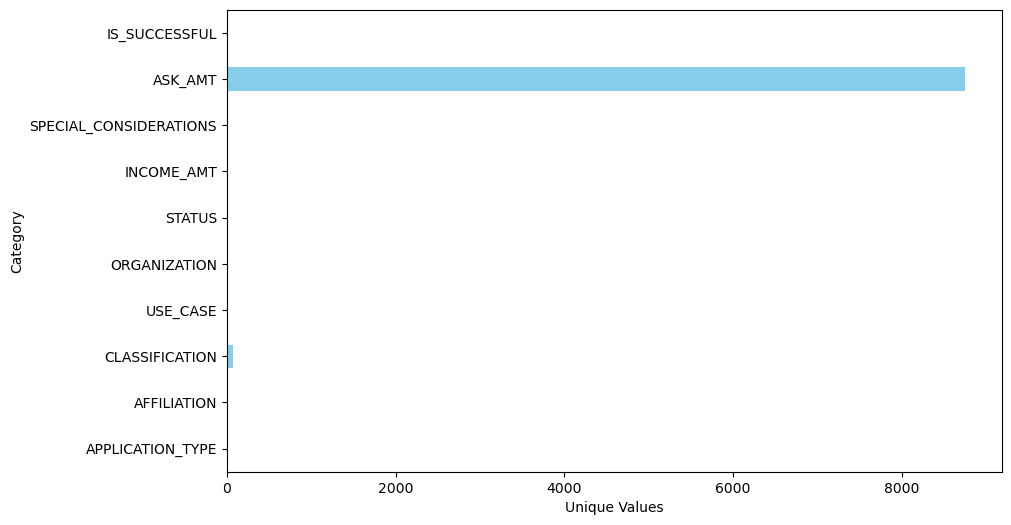

In [20]:
#These bar graphs are unnecessary but personally help me visualize my data during optimization.
unique_values.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.xlabel('Unique Values')
plt.ylabel('Category')
plt.show()

In [21]:
# Look at APPLICATION_TYPE value counts for binning
app_type_val_counts = application_df['APPLICATION_TYPE'].value_counts()
print(app_type_val_counts)

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


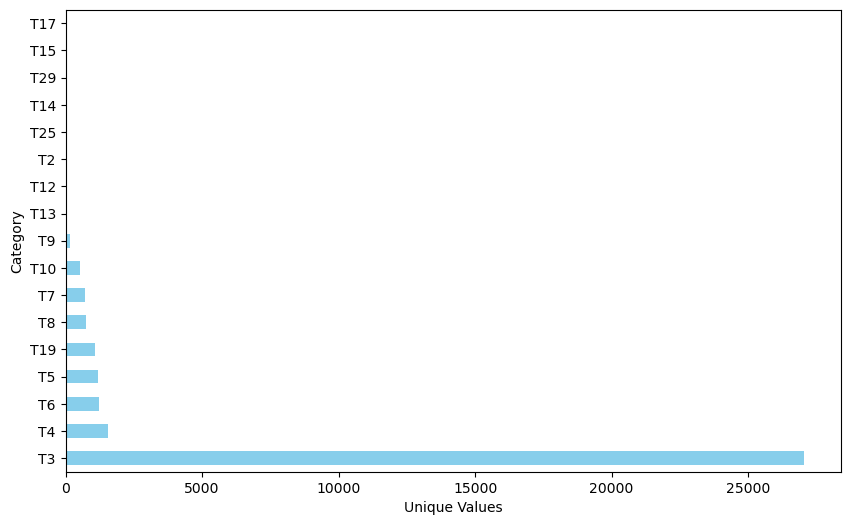

In [22]:
#These bar graphs are unnecessary but personally help me visualize my data during optimization.
app_type_val_counts.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.xlabel('Unique Values')
plt.ylabel('Category')
plt.show()

In [23]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value = 10
application_types_to_replace = application_df['APPLICATION_TYPE'].value_counts()[application_df['APPLICATION_TYPE'].value_counts() < cutoff_value].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
T12         27
T2          16
Other       11
Name: APPLICATION_TYPE, dtype: int64

In [24]:
# Look at CLASSIFICATION value counts for binning
classification_value_counts = application_df['CLASSIFICATION'].value_counts()

# You may find it helpful to look at CLASSIFICATION value counts >1
print(classification_value_counts[classification_value_counts > 1])

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64


In [25]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff_value = 10
classifications_to_replace = application_df['CLASSIFICATION'].value_counts()[application_df['CLASSIFICATION'].value_counts() < cutoff_value].index

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Other       98
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
Name: CLASSIFICATION, dtype: int64

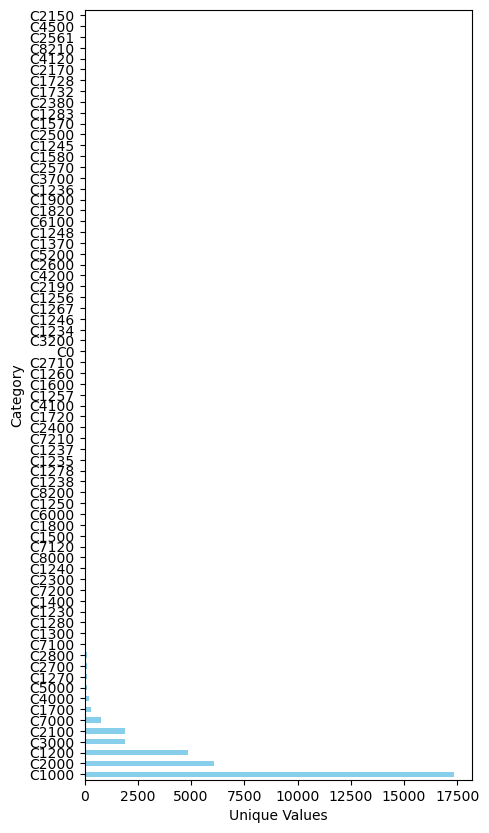

In [26]:
# again, I only added these bar graphs because I need them to visualize my project.
classification_value_counts.plot(kind='barh', figsize=(5, 10), color='skyblue')
plt.xlabel('Unique Values')
plt.ylabel('Category')
plt.show()

In [27]:
#Check datatypes
display('Datatypes:')
display(application_df.dtypes)
# Convert categorical data to numeric with `pd.get_dummies`
application_df_encoded = pd.get_dummies(application_df, columns=['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'])
#Double check to make sure datatypes have been properly converted
display('Datatypes after encoding:')
display(application_df_encoded.dtypes)

'Datatypes:'

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

'Datatypes after encoding:'

STATUS                      int64
ASK_AMT                     int64
IS_SUCCESSFUL               int64
APPLICATION_TYPE_Other      uint8
APPLICATION_TYPE_T10        uint8
                            ...  
INCOME_AMT_25000-99999      uint8
INCOME_AMT_50M+             uint8
INCOME_AMT_5M-10M           uint8
SPECIAL_CONSIDERATIONS_N    uint8
SPECIAL_CONSIDERATIONS_Y    uint8
Length: 72, dtype: object

In [28]:
# Split our preprocessed data into our features and target arrays
X = application_df_encoded.drop('IS_SUCCESSFUL', axis=1)
y = application_df_encoded['IS_SUCCESSFUL']
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [29]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [30]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

input_features = len(X_train.columns)
print(f'input features: {input_features}')

input features: 71


In [31]:
# First hidden layer
nn.add(tf.keras.layers.Dense(units=10, input_dim=input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=5, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                720       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 781 (3.05 KB)
Trainable params: 781 (3.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
# Create a callback that saves the weights every five epochs
checkpoint_path = 'AlphabetSoupCharity_weights.{epoch:02d}.hdf5'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_freq='epoch',
    period=5
)

# Train the model
model_history = nn.fit(X_train_scaled, y_train, epochs=60, validation_data=(X_test_scaled, y_test), callbacks=[checkpoint_callback])

Epoch 1/60
804/804 [==============================] - 2s 2ms/step - loss: 0.5419 - accuracy: 0.7370 - val_loss: 0.5535 - val_accuracy: 0.7268
Epoch 2/60
804/804 [==============================] - 2s 2ms/step - loss: 0.5417 - accuracy: 0.7363 - val_loss: 0.5534 - val_accuracy: 0.7265
Epoch 3/60
804/804 [==============================] - 2s 2ms/step - loss: 0.5416 - accuracy: 0.7357 - val_loss: 0.5523 - val_accuracy: 0.7257
Epoch 4/60
804/804 [==============================] - 2s 2ms/step - loss: 0.5413 - accuracy: 0.7357 - val_loss: 0.5521 - val_accuracy: 0.7262
Epoch 5/60
804/804 [==============================] - 2s 2ms/step - loss: 0.5414 - accuracy: 0.7365 - val_loss: 0.5531 - val_accuracy: 0.7261
Epoch 6/60
804/804 [==============================] - 2s 2ms/step - loss: 0.5412 - accuracy: 0.7365 - val_loss: 0.5528 - val_accuracy: 0.7266
Epoch 7/60
804/804 [==============================] - 2s 3ms/step - loss: 0.5413 - accuracy: 0.7360 - val_loss: 0.5539 - val_accuracy: 0.7252
Epoch 

In [40]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5525 - accuracy: 0.7256 - 358ms/epoch - 1ms/step
Loss: 0.5524667501449585, Accuracy: 0.7255976796150208


## Visualizing training and validation loss and accuracy over epochs

In [41]:
# Access the training history
training_loss = model_history.history['loss']
training_accuracy = model_history.history['accuracy']
validation_loss = model_history.history['val_loss']
validation_accuracy = model_history.history['val_accuracy']

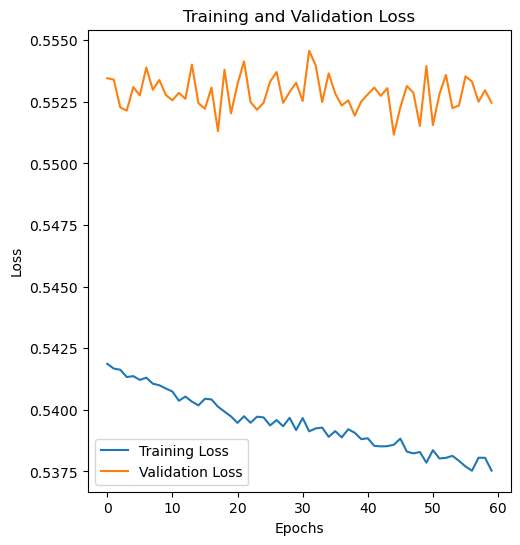

In [42]:
# Visualize training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

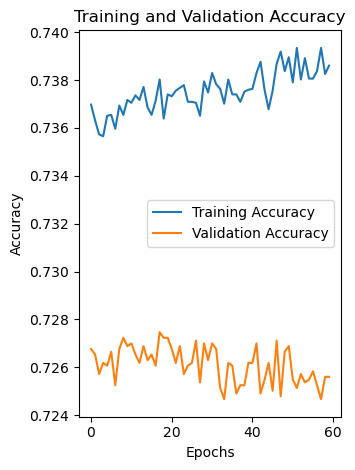

In [43]:
# Visualize training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

These results indicate that accuracy is rising slowly but steadily with every epoch, and although there is not a significant difference in the accuracy of 10 epochs vs. 60 epochs, if the program ran enough epochs, accuracy would porbably eventually reach 75%. VS Code would probably crash before that cell finished running.